# Superfícies de erro com formatos diferentes

Neste exemplo, iremos criar funções objetivo com atributos com diferentes intervalos de variação. Desta forma, entenderemos como o intervalo de variação dos atributos afeta o formato da superfície de erro.

In [ ]:
# Import all necessary libraries
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

### Definindo uma função que calcule os pontos que serão usados plotar a superfície de erro

In [ ]:
def calculateErrorSurface(x1, x2, y):
    """Generate data points for plotting the error surface."""

    # Retrieve the number of samples.
    N = len(y)

    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-20.0, 24.0, M)
    a2 = np.linspace(-20.0, 24.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis funcion employed in this example.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            # Calculate the MSE for each new pair of a1 and a2 (weights) values.
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat));

    return J, A1, A2

### Definindo o número de exemplos

In [ ]:
# Number of pairs feature/label.
N = 10000

# Função objetivo #1

Nesta função objetivo, o atributo $x_1$ tem um intervalo de variação maior do que o de $x_2$. Vejam que o atributo $x_1$ tem variância maior do que a variância de $x_2$.

$x_1 = 2 \times \text{randn()}$

$x_2 = \text{randn()}$

$y = x_1 + x2$

In [ ]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

# Input values (attributes)
x1 = 2*np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

#### Plotando os histogramas de $x_1$ e $x_2$.

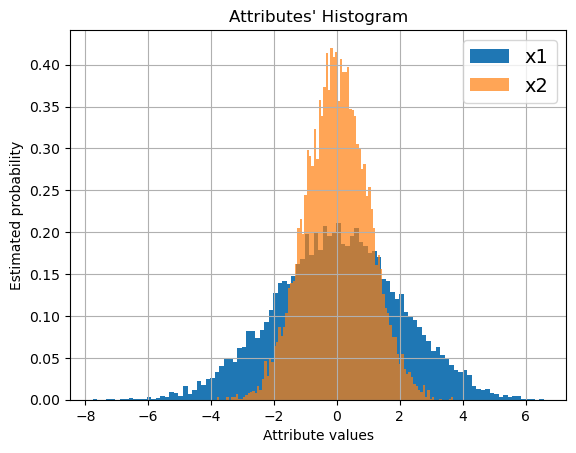

In [ ]:
plt.figure()
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, alpha=0.7, label='x2')
plt.xlabel('Attribute values')
plt.ylabel('Estimated probability')
plt.legend(fontsize=14)
plt.grid()
plt.title('Attributes\' Histogram')
plt.show()

#### Plotando a superfície de erro e de contorno.

Percebam que por terem intervalos de variação diferentes, as superfícies de erro e de contorno terão formatos de vale, indicando que o erro varia mais rapidamente na direção do peso associado ao atributo com maior intervalo de variação. No caso desta função objetivo, o erro varia mais rapidamente na direção de $a_1$, pois o atributo associado a ele, $x_1$, tem um intervalo de variação maior do que o de $x_2$.

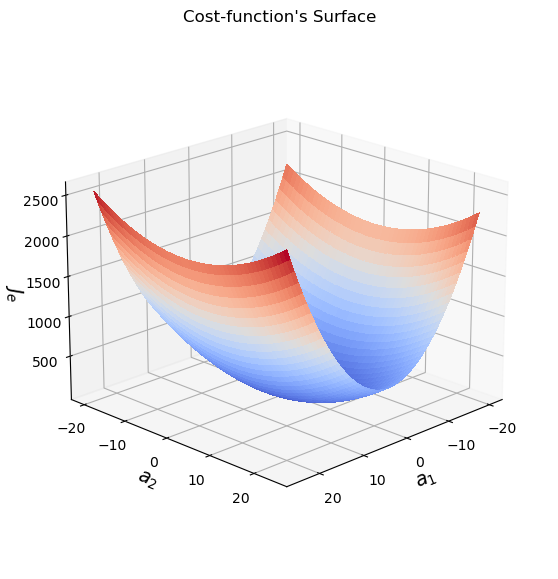

In [ ]:
# Generate data points for plotting the error surface.
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy)

fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.set_box_aspect(aspect=None, zoom=0.89)
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#Show the plot.
plt.show()

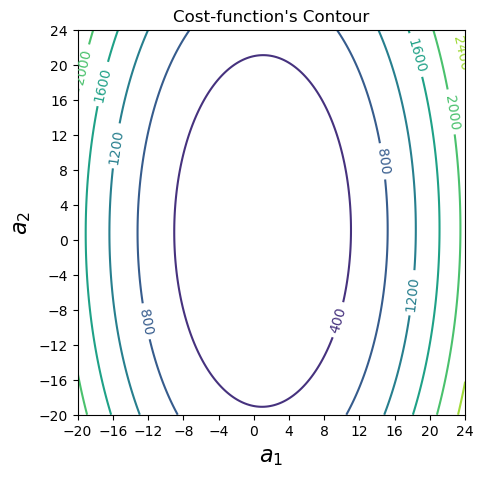

In [ ]:
# Plot figure.
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_2$', fontsize=16)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

# Função objetivo #2

Nesta função objetivo, o atributo $x_2$ tem um intervalo de variação maior do que o de $x_1$. Vejam que o atributo $x_2$ tem variância maior do que a variância de $x_1$.

$x_1 = \text{randn()}$

$x_2 = 2 \times \text{randn()}$

$y = x_1 + x2$

In [ ]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

# Input values (attributes)
x1 = np.random.randn(N, 1)
x2 = 2 * np.random.randn(N, 1)

# True model.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

#### Plotando os histogramas de $x_1$ e $x_2$.

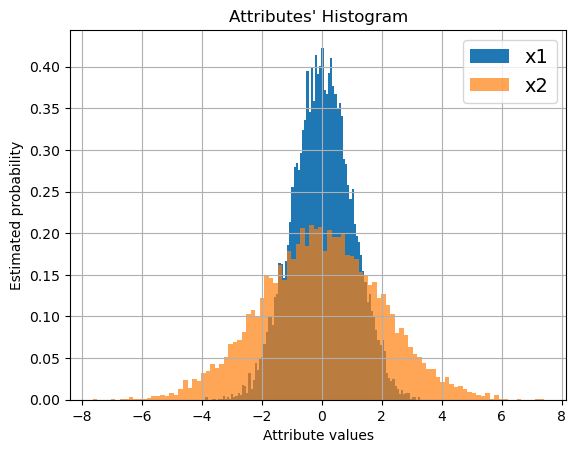

In [ ]:
plt.figure()
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, alpha=0.7, label='x2')
plt.xlabel('Attribute values')
plt.ylabel('Estimated probability')
plt.legend(fontsize=14)
plt.grid()
plt.title('Attributes\' Histogram')
plt.show()

#### Plotando a superfície de erro e de contorno.

Percebam que por terem intervalos de variação diferentes, as superfícies de erro e de contorno terão formatos de vale, indicando que o erro varia mais rapidamente na direção do peso associado ao atributo com maior intervalo de variação. No caso desta função objetivo, o erro varia mais rapidamente na direção de $a_2$, pois o atributo associado a ele, $x_2$, tem um intervalo de variação maior do que o de $x_1$.

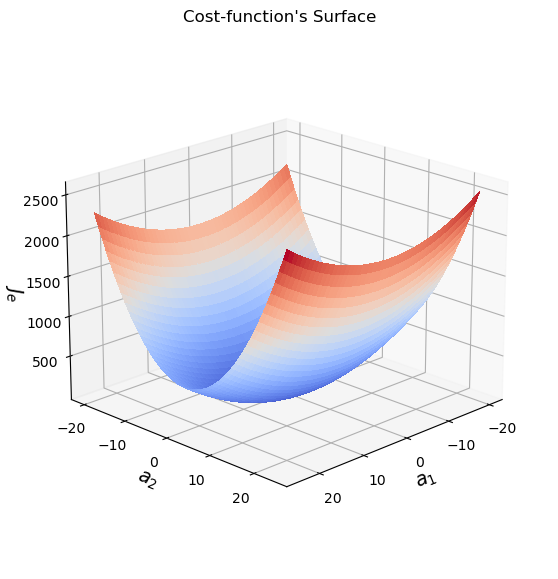

In [ ]:
# Generate data points for plotting the error surface.
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy)

fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.set_box_aspect(aspect=None, zoom=0.89)
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#Show the plot.
plt.show()

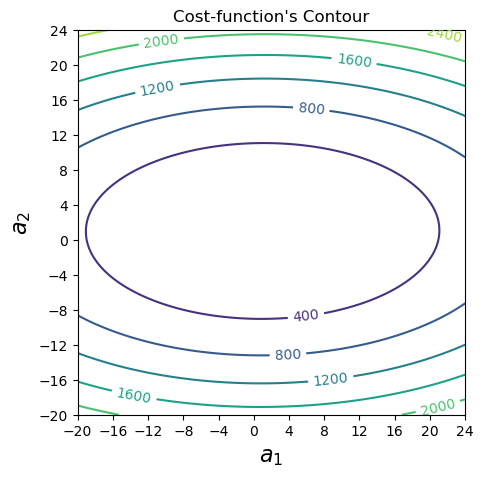

In [ ]:
# Plot figure.
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_2$', fontsize=16)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

# Função objetivo #3

Nesta função objetivo, o atributo $x_1$ tem um intervalo de variação similar ao de $x_2$. Vejam que os dois atributos têm a mesma variância.

$x_1 = 2 \times \text{randn()}$

$x_2 = 2 \times \text{randn()}$

$y = x_1 + x2$

In [ ]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

# Input values (attributes)
x1 = 2*np.random.randn(N, 1)
x2 = 2*np.random.randn(N, 1)

# True model.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

#### Plotando os histogramas de $x_1$ e $x_2$.

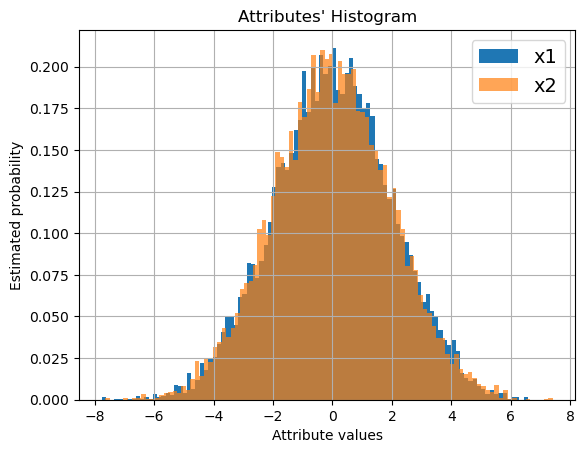

In [ ]:
plt.figure()
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, alpha=0.7, label='x2')
plt.xlabel('Attribute values')
plt.ylabel('Estimated probability')
plt.legend(fontsize=14)
plt.grid()
plt.title('Attributes\' Histogram')
plt.show()

#### Plotando a superfície de erro e de contorno.

Percebam que por terem intervalos de variação similares, as superfícies de erro e de contorno terão formatos circulares, indicando que o erro varia de forma similar ao longo das variações dos dois pesos associados aos atributos.

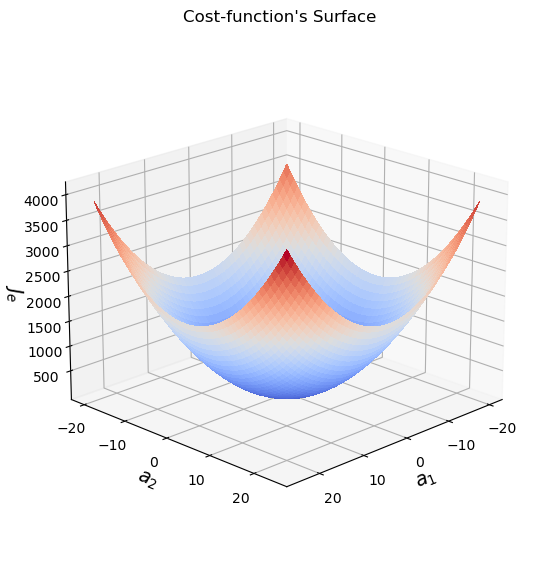

In [ ]:
# Generate data points for plotting the error surface.
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy)

fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.set_box_aspect(aspect=None, zoom=0.89)
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#Show the plot.
plt.show()

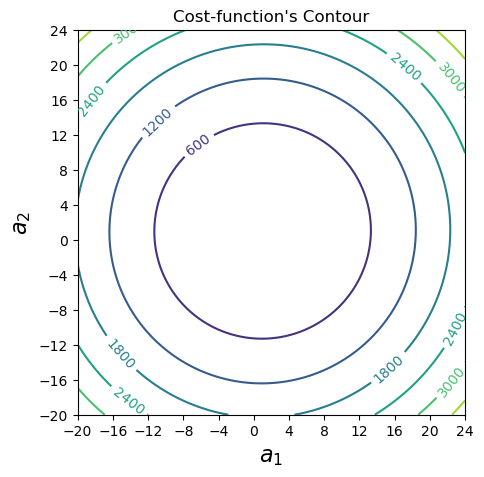

In [ ]:
# Plot figure.
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_2$', fontsize=16)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

# Função objetivo #4

Nesta função objetivo, o atributo $x_1$ tem um intervalo de variação similar ao de $x_2$. Vejam que os dois atributos têm a mesma variância.

$x_1 = \text{randn()}$

$x_2 = \text{randn()}$

$y = x_1 + x2$

In [ ]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

# Input values (attributes)
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

#### Plotando os histogramas de $x_1$ e $x_2$.

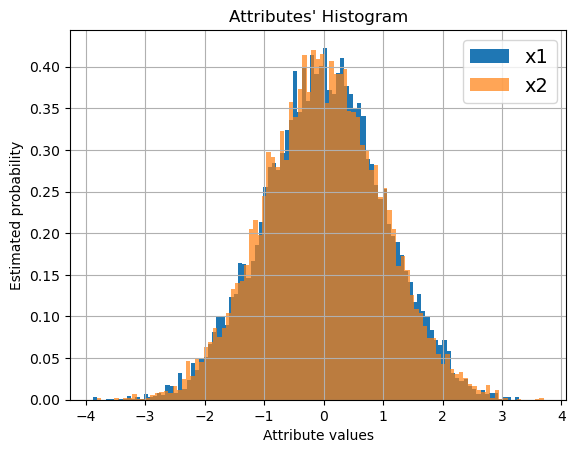

In [ ]:
plt.figure()
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, alpha=0.7, label='x2')
plt.xlabel('Attribute values')
plt.ylabel('Estimated probability')
plt.legend(fontsize=14)
plt.grid()
plt.title('Attributes\' Histogram')
plt.show()

#### Plotando a superfície de erro e de contorno.

Percebam que por terem intervalos de variação similares, as superfícies de erro e de contorno terão formatos circulares, indicando que o erro varia de forma similar ao longo das variações dos dois pesos associados aos atributos.

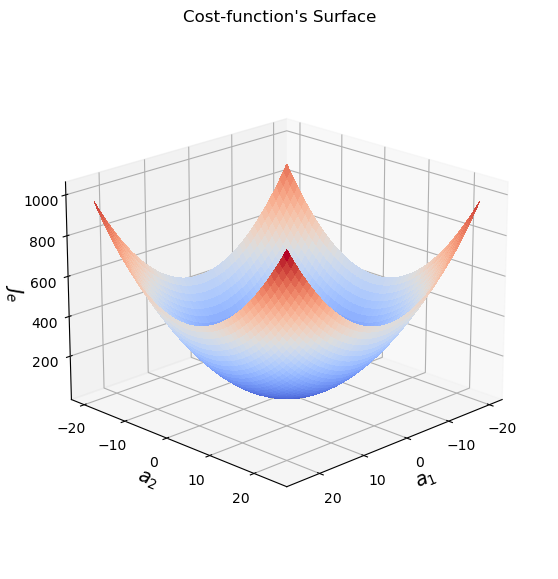

In [ ]:
# Generate data points for plotting the error surface.
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy)

fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.set_box_aspect(aspect=None, zoom=0.89)
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#Show the plot.
plt.show()

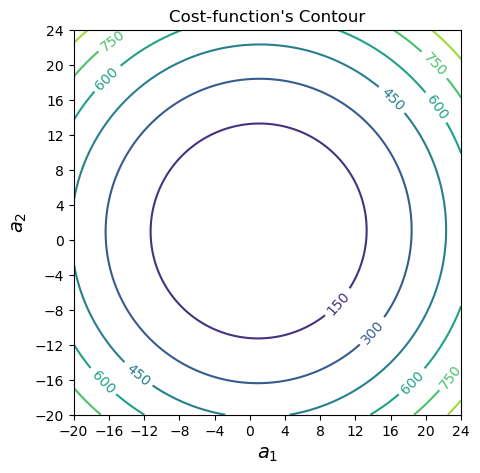

In [ ]:
# Plot figure.
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

**OBS**.: Percebam que o que importa é que os atributos tenham intervalos de variação similares. Ou seja, nos dois últimos exemplos acima, mesmo eles tendo variâncias diferentes para os atributos, ambos atribuitos tem a mesma variância, fazendo com que tenham intervalos de variação similares e, consequentemente, tenham superfícies de erro circulares (i.e., formato de tigela).